# Breast Cancer Wisconsin (Diagnostic) DataSet

------> Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

------>The mean, standard error and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features. For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

------>All feature values are recoded with four significant digits.

------>Missing attribute values: none

------>Class distribution: 357 benign, 212 malignant

### Import the DataSet and Vizualize the Information

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

As we can see only the 'Unnamed: 32' feature has all values filled with null. So this columns can be droped!

### Engineering Data Analysis

##### 1) 'Unnamed: 32' feature.

In [6]:
df = df.drop('Unnamed: 32', axis=1)

##### 2) 'id' feature.

Knowing the id of the patient will be irrelevant for our model and may cause confusion, so we drop it.

In [7]:
df = df.drop('id', axis = 1)

##### 3) 'diagnosis' feature.

As we can see this feature is a String Object so we need to convert it to a binary classification. By default M will be assign to 1 and B will be assign to 0.

In [8]:
df['diagnosis'] = df['diagnosis'].replace(['M', 'B'], [1,0])

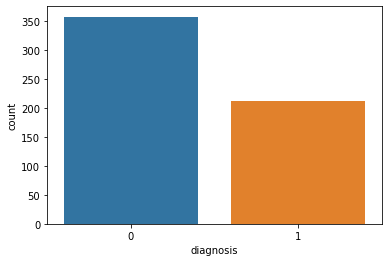

In [9]:
sns.countplot('diagnosis', data = df)

##### Correlation Between The Features

In [10]:
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

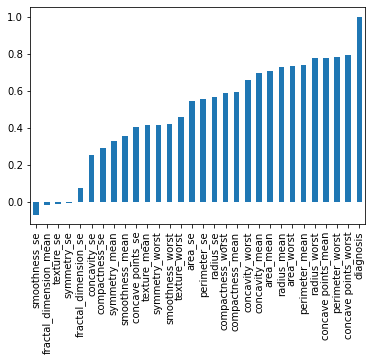

In [11]:
df.corr()['diagnosis'][:-1].sort_values().plot(kind='bar')

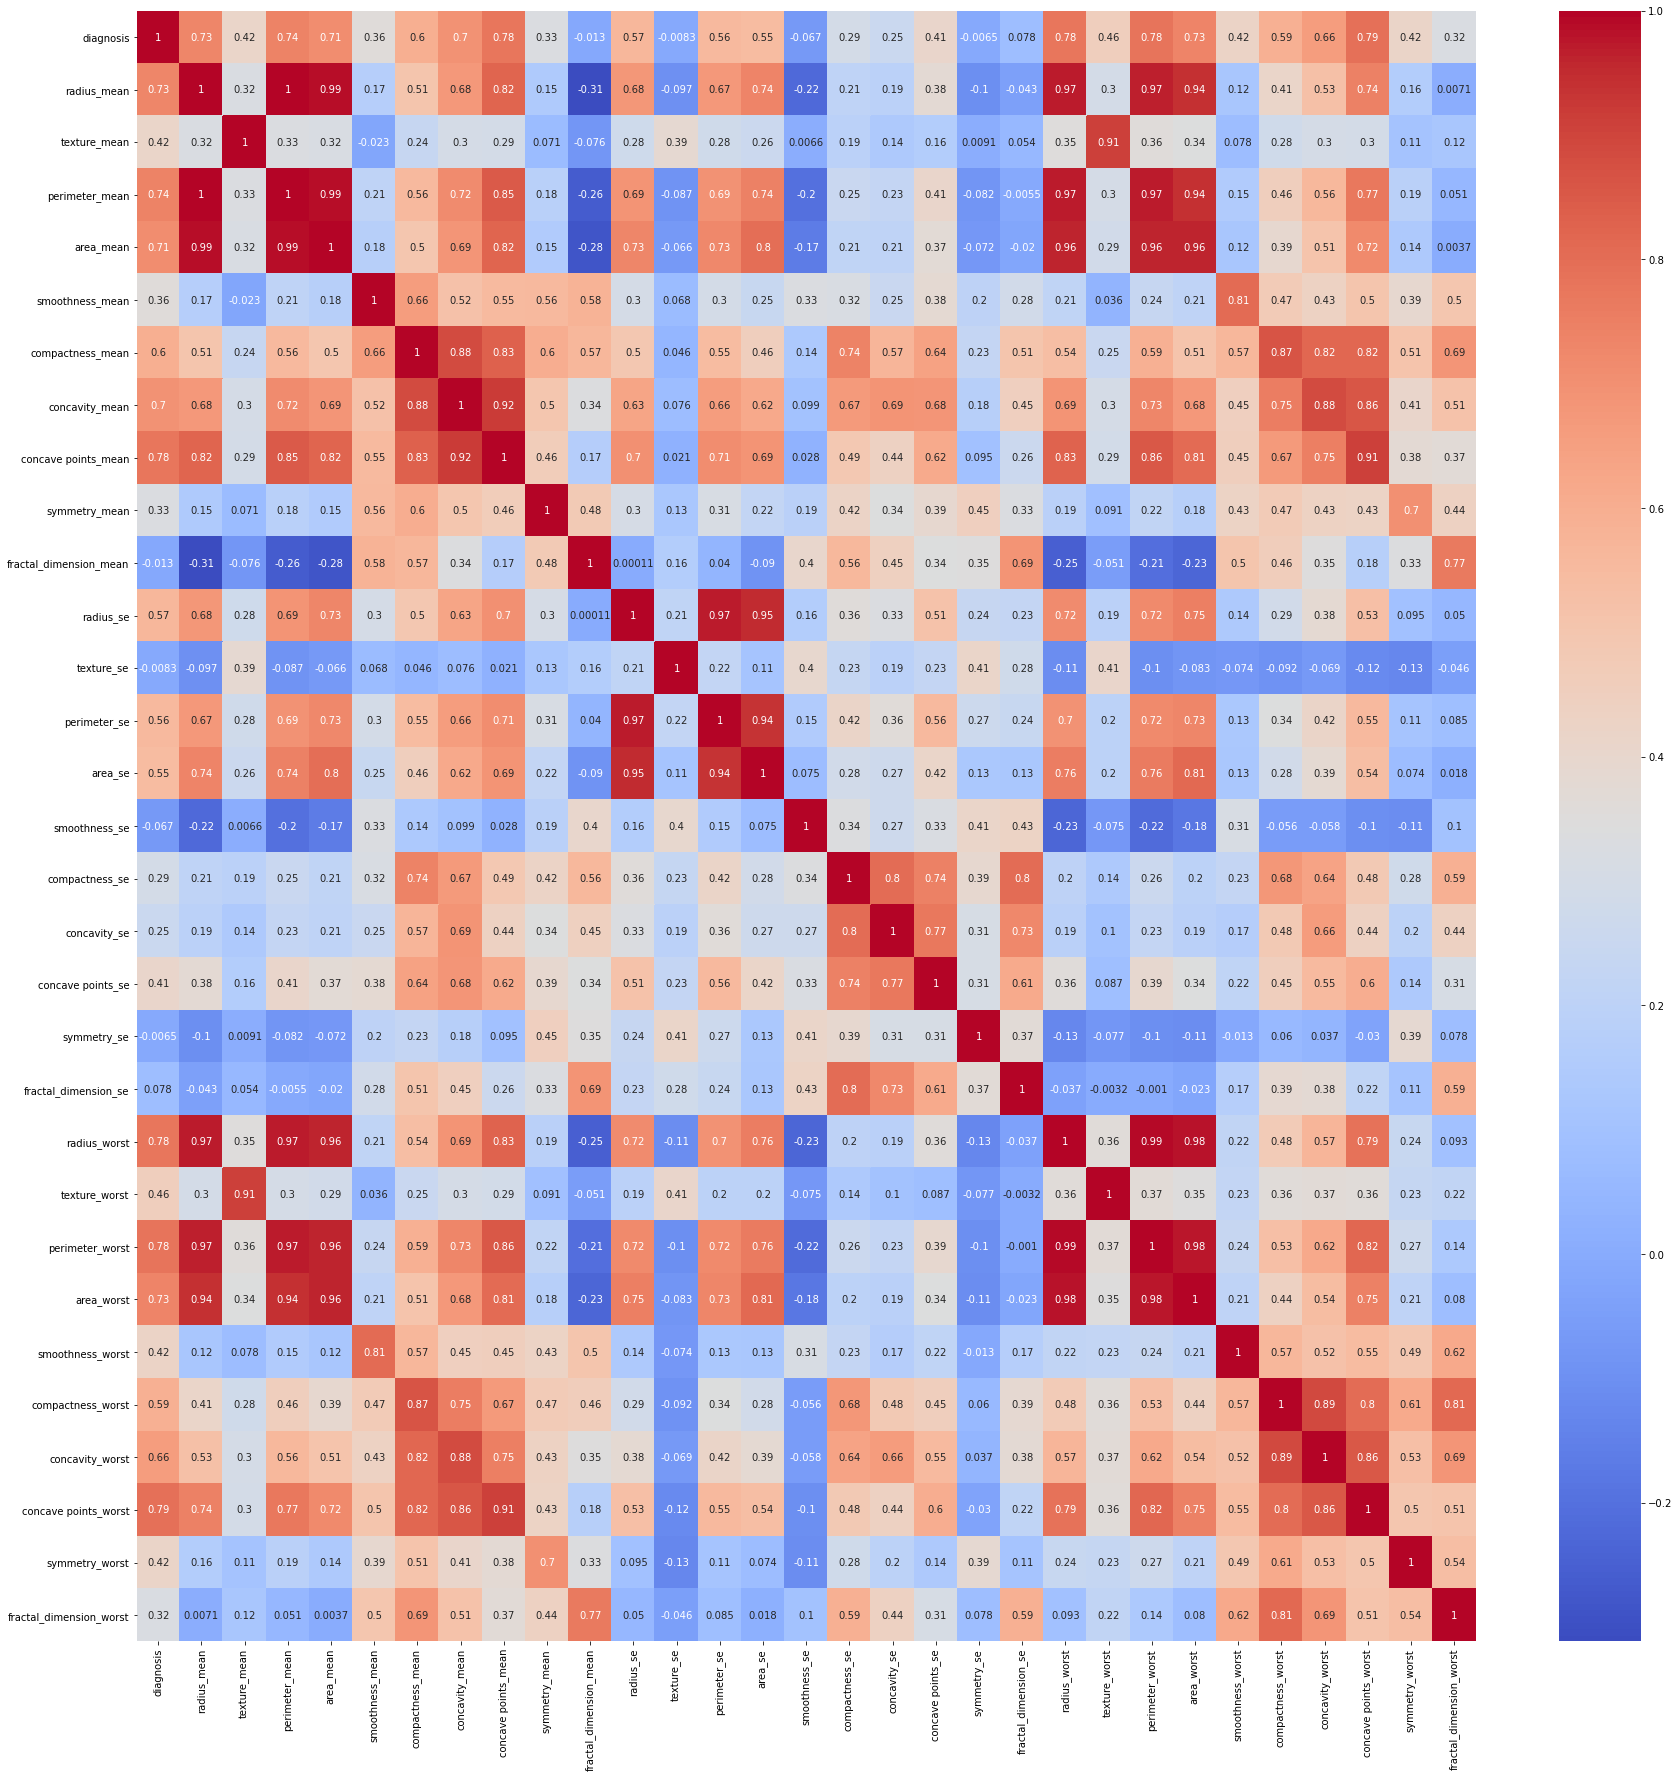

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")

# <font color='green'><b> NEURAL NETWORKS </b> (Multi-Layer Perceptron)</font>

### Train Test Split

Let's now divide our dataset in two parts. The X with the features and the Y with the lable 'diagnosis'.

In [13]:
X = df.drop('diagnosis', axis = 1).values
Y = df['diagnosis'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

### Scaling Data

Lets scaling the data to avoid problem in training our Neural Network. Reminder: fit_transform -> X_train ; tranform -> X_test

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Creating the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten, Conv2D, MaxPooling2D

In [18]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=10,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

To avoid overfiting create a earlystop criteria!

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

### Training The Model

In [21]:
model.fit(x=X_train_scaled,y=Y_train, validation_data=(X_test_scaled, Y_test), batch_size=450, epochs=600, callbacks=[cb])

Epoch 1/600
1/1 [==============================] - 1s 966ms/step - loss: 0.7014 - val_loss: 0.6939
Epoch 2/600
1/1 [==============================] - 0s 22ms/step - loss: 0.6954 - val_loss: 0.6884
Epoch 3/600
1/1 [==============================] - 0s 21ms/step - loss: 0.6896 - val_loss: 0.6835
Epoch 4/600
1/1 [==============================] - 0s 19ms/step - loss: 0.6841 - val_loss: 0.6787
Epoch 5/600
1/1 [==============================] - 0s 21ms/step - loss: 0.6787 - val_loss: 0.6742
Epoch 6/600
1/1 [==============================] - 0s 20ms/step - loss: 0.6737 - val_loss: 0.6702
Epoch 7/600
1/1 [==============================] - 0s 18ms/step - loss: 0.6688 - val_loss: 0.6663
Epoch 8/600
1/1 [==============================] - 0s 19ms/step - loss: 0.6642 - val_loss: 0.6623
Epoch 9/600
1/1 [==============================] - 0s 22ms/step - loss: 0.6598 - val_loss: 0.6583
Epoch 10/600
1/1 [==============================] - 0s 24ms/step - loss: 0.6555 - val_loss: 0.6544
Epoch 11/600
1/1 [

Epoch 84/600
1/1 [==============================] - 0s 29ms/step - loss: 0.2323 - val_loss: 0.2243
Epoch 85/600
1/1 [==============================] - 0s 26ms/step - loss: 0.2287 - val_loss: 0.2210
Epoch 86/600
1/1 [==============================] - 0s 22ms/step - loss: 0.2252 - val_loss: 0.2178
Epoch 87/600
1/1 [==============================] - 0s 20ms/step - loss: 0.2218 - val_loss: 0.2147
Epoch 88/600
1/1 [==============================] - 0s 20ms/step - loss: 0.2185 - val_loss: 0.2117
Epoch 89/600
1/1 [==============================] - 0s 20ms/step - loss: 0.2152 - val_loss: 0.2088
Epoch 90/600
1/1 [==============================] - 0s 19ms/step - loss: 0.2120 - val_loss: 0.2059
Epoch 91/600
1/1 [==============================] - 0s 21ms/step - loss: 0.2089 - val_loss: 0.2032
Epoch 92/600
1/1 [==============================] - 0s 24ms/step - loss: 0.2058 - val_loss: 0.2005
Epoch 93/600
1/1 [==============================] - 0s 33ms/step - loss: 0.2027 - val_loss: 0.1979
Epoch 94/6

1/1 [==============================] - 0s 18ms/step - loss: 0.0813 - val_loss: 0.1229
Epoch 167/600
1/1 [==============================] - 0s 20ms/step - loss: 0.0806 - val_loss: 0.1226
Epoch 168/600
1/1 [==============================] - 0s 19ms/step - loss: 0.0800 - val_loss: 0.1223
Epoch 169/600
1/1 [==============================] - 0s 17ms/step - loss: 0.0793 - val_loss: 0.1220
Epoch 170/600
1/1 [==============================] - 0s 18ms/step - loss: 0.0787 - val_loss: 0.1217
Epoch 171/600
1/1 [==============================] - 0s 17ms/step - loss: 0.0781 - val_loss: 0.1213
Epoch 172/600
1/1 [==============================] - 0s 17ms/step - loss: 0.0775 - val_loss: 0.1210
Epoch 173/600
1/1 [==============================] - 0s 16ms/step - loss: 0.0769 - val_loss: 0.1208
Epoch 174/600
1/1 [==============================] - 0s 20ms/step - loss: 0.0764 - val_loss: 0.1205
Epoch 175/600
1/1 [==============================] - 0s 17ms/step - loss: 0.0758 - val_loss: 0.1203
Epoch 176/600


1/1 [==============================] - 0s 14ms/step - loss: 0.0546 - val_loss: 0.1149
Epoch 249/600
1/1 [==============================] - 0s 15ms/step - loss: 0.0545 - val_loss: 0.1152
Epoch 250/600
1/1 [==============================] - 0s 15ms/step - loss: 0.0543 - val_loss: 0.1153
Epoch 251/600
1/1 [==============================] - 0s 16ms/step - loss: 0.0542 - val_loss: 0.1152
Epoch 252/600
1/1 [==============================] - 0s 15ms/step - loss: 0.0540 - val_loss: 0.1151
Epoch 253/600
1/1 [==============================] - 0s 15ms/step - loss: 0.0539 - val_loss: 0.1150
Epoch 00253: early stopping


After we train our model analyze the loss and validation loss in order to find out if any change need to be done in the call back to make the model better.

In [22]:
losses = pd.DataFrame(model.history.history)

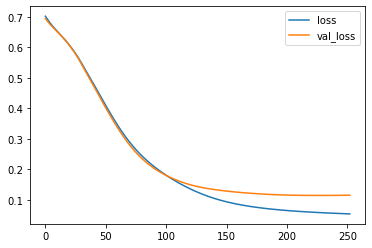

In [23]:
losses.plot()

### Model Evaluation

In [24]:
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

In [25]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [26]:
print(confusion_matrix(Y_test,predictions))

[[85  3]
 [ 1 54]]


In [27]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.95      0.98      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [28]:
print(accuracy_score(Y_test,predictions))

0.972027972027972


# <font color='green'><b> Logistic Regression </b></font>

Note: the dataset is the same including the scaled done in the Neural Networks section.

### Create The Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

### Train and Predicting

In [31]:
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluating The Model

In [32]:
print(confusion_matrix(Y_test,predictions))

[[83  5]
 [ 3 52]]


In [33]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        88
           1       0.91      0.95      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [34]:
print(accuracy_score(Y_test,predictions))

0.9440559440559441


# <font color='green'><b> KNeighbors Classifier </b></font>

Any variables that are on a large scale will have a much larger effect on the distance between the observations than variables that are on a small scale. So we have to standarize the variables!

### Standardize the Features

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler_kkn = StandardScaler()

In [37]:
scaled_features = scaler_kkn.fit_transform(X)

### Train Test Split

In oposition to the Logistic Regression, we need to split the data into training data and test data, using the standadize data.

Note: To take a better conclusion from the analyse of the models we will keep the test_size constant

In [38]:
X_train_kn, X_test_kn, Y_train_kn, Y_test_kn = train_test_split(scaled_features,Y, test_size=0.25)

### Choosing a K Value

Note: this code is called the "Elbow Method" used to choose the best K value.

Taken from: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [39]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for k in range(1,30):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


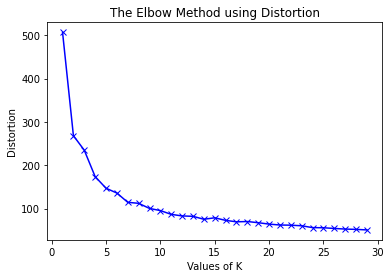

In [40]:
plt.plot(range(1,30), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

From this model we can conclude that the best K value is around 8, where we see the elbow. So lets train our model with that number of clusters.

### Creating The Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=8)

### Train and Predicting

In [43]:
knn.fit(X_train_kn,Y_train_kn)

KNeighborsClassifier(n_neighbors=8)

In [44]:
predictions = knn.predict(X_test_kn)

### Evaluating The Model

In [45]:
print(confusion_matrix(Y_test_kn,predictions))

[[95  0]
 [ 4 44]]


In [46]:
print(classification_report(Y_test_kn,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        95
           1       1.00      0.92      0.96        48

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [47]:
print(accuracy_score(Y_test_kn,predictions))

0.972027972027972


# <font color='green'><b> Decision Trees </b></font>

### Train Test Split

In [48]:
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X,Y, test_size=0.25)

### Creating The Model

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
decision_tree_model = DecisionTreeClassifier()

### Train and Predicting

In [51]:
decision_tree_model.fit(X_train_dt,Y_train_dt)

DecisionTreeClassifier()

In [52]:
predictions = decision_tree_model.predict(X_test_dt)

### Evaluating The Model

In [53]:
print(confusion_matrix(Y_test_dt,predictions))

[[80  7]
 [ 6 50]]


In [54]:
print(classification_report(Y_test_dt,predictions))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        87
           1       0.88      0.89      0.88        56

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143



In [55]:
print(accuracy_score(Y_test_dt,predictions))

0.9090909090909091


# <font color='green'><b> Random Forest </b></font>

In [56]:
from sklearn.ensemble import RandomForestClassifier

### Creating The Model

In [57]:
rf = RandomForestClassifier(n_estimators=100)

### Train and Predicting

In [58]:
rf.fit(X_train_dt, Y_train_dt)

RandomForestClassifier()

In [59]:
predictions = rf.predict(X_test_dt)

### Evaluating The Model

In [60]:
print(confusion_matrix(Y_test_dt,predictions))

[[86  1]
 [ 5 51]]


In [61]:
print(classification_report(Y_test_dt,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        87
           1       0.98      0.91      0.94        56

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [62]:
print(accuracy_score(Y_test_dt,predictions))

0.958041958041958


# <font color='green'><b> Support Vector Machine </b></font>

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Tunning the best parameters for C and Gamma

We start to create a dictionary with the most commun values:

In [64]:
parameters = [{'kernel': ['rbf'], 'gamma': [ 1e-3, 1e-2, 1e-2, 1e0, 1e1, 1e2],
                     'C': [0.001,0.01, 0.1, 1, 10, 100, 1000, 10000,100000]}]

Now we preform a cicle to train and evaluate our model evaluating the precision and recall with each combination of C and Gamma.

In [65]:
scores = ['precision', 'recall']
for score in scores:
 
    model_svm = GridSearchCV(SVC(),parameters, cv= 3, scoring='%s_macro' % score)
    model_svm.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print('Gamma:',model_svm.best_estimator_.gamma)
    print('C:',model_svm.best_estimator_.C)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

Best parameters set found on development set:
Gamma: 0.001
C: 1
Best parameters set found on development set:
Gamma: 0.001
C: 1


### Creating The Model

In [66]:
model_svm_best = SVC(max_iter = 1000000, kernel = 'rbf', gamma =model_svm.best_estimator_.gamma, C =model_svm.best_estimator_.C)


In [67]:
model_svm_best.fit(X_train, Y_train)

SVC(C=1, gamma=0.001, max_iter=1000000)

### Train and Predict

In [68]:
predictions = model_svm_best.predict(X_test)

In [69]:
print(confusion_matrix(Y_test,predictions))

[[84  4]
 [ 4 51]]


In [70]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.93      0.93      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [71]:
print(accuracy_score(Y_test,predictions))

0.9440559440559441
